In [3]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import skimage.util
import scipy.ndimage as ndimage
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np
import matplotlib
from typing import Dict
import skimage.util


plt.gray()
lena= rgb2gray(imread('lena.tiff'))
cameraman = imread('cameraman.tif').astype(np.float64)/255


def gaussian_filter(n_rows, n_cols, stdv):
    """
    Returns a 2d Gaussian image filter.
    """
    g_r = signal.windows.gaussian(n_rows, stdv)
    g_c = signal.windows.gaussian(n_cols, stdv)

    G = np.outer(g_r, g_c)

    return G/np.sum(G)

def PSNR(f,g):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))

def plot_images(images: Dict[str, np.ndarray], title=None, vmin_vmax=False):
    """Plots all images in a row""",
    fig = plt.figure(figsize=(12, 4))
    for index, (subtitle, image) in enumerate(images.items(), 1):
        ax = fig.add_subplot(1, len(images), index)
        if vmin_vmax:
            ax.imshow(image, vmin=0, vmax=1)
        else:
            ax.imshow(image)
        ax.title.set_text(subtitle)
    if title:
        fig.suptitle(title)
    plt.show()


<Figure size 640x480 with 0 Axes>

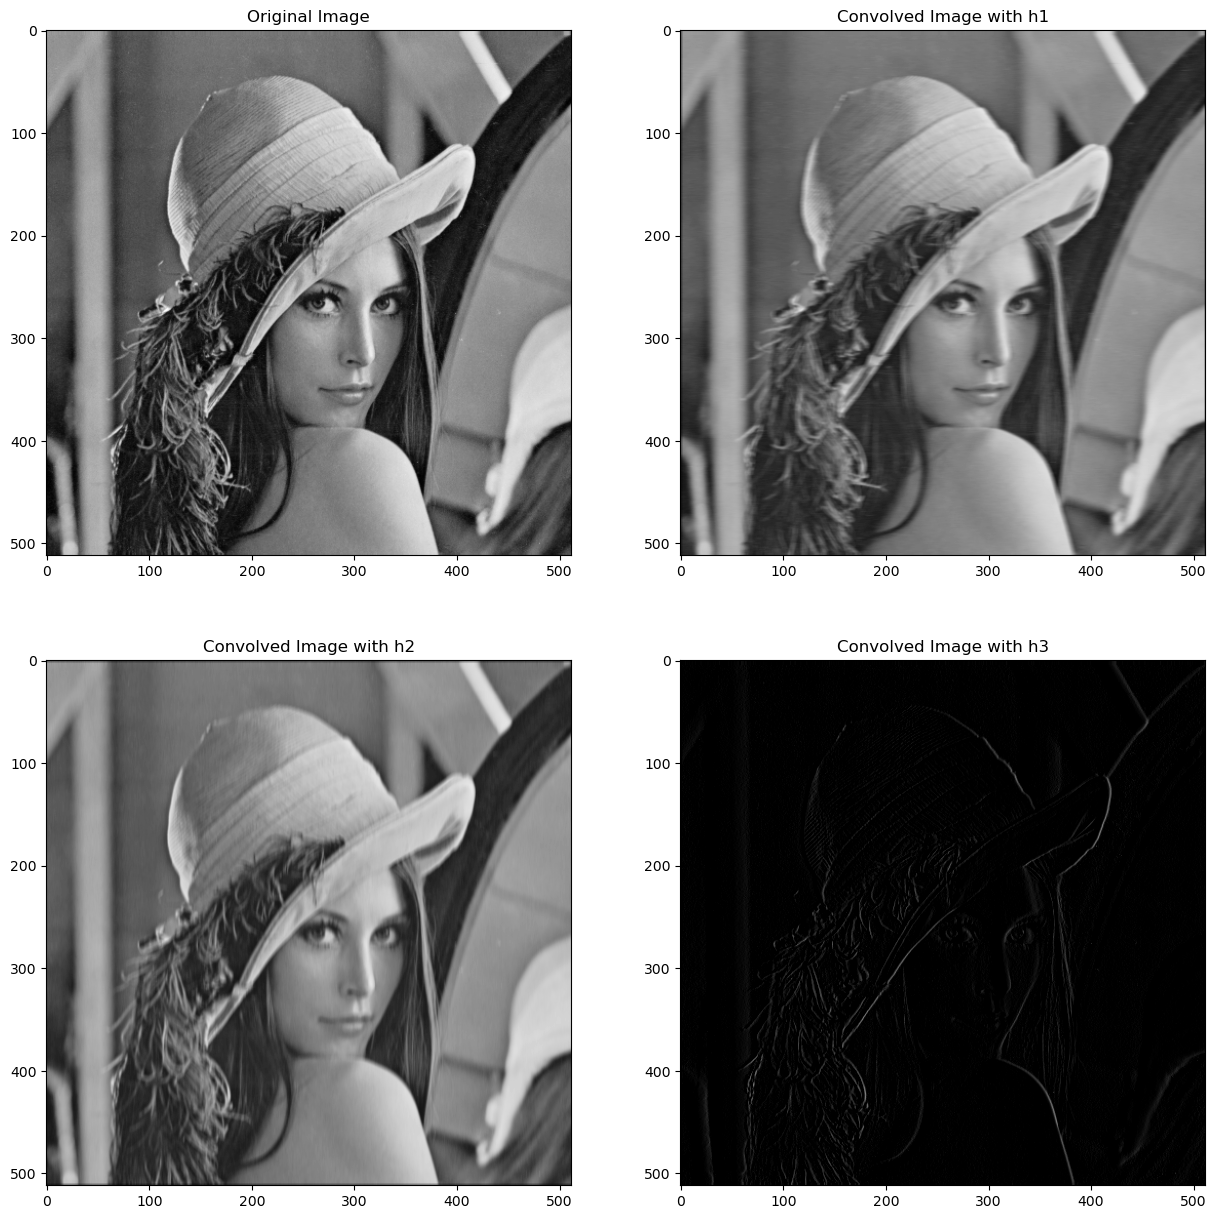

In [4]:
# Part 2 Discrete Convolution for Image Processing

h1 = (1/6)*np.ones((1,6))
h2 = h1.T
h3 = np.array([[-1,1]])

convolved_lena1 = signal.convolve2d(lena, h1, mode='same')
convolved_lena2 = signal.convolve2d(lena, h2, mode='same')
convolved_lena3 = signal.convolve2d(lena, h3, mode='same')

plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
plt.imshow(lena)
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(convolved_lena1, vmin=0, vmax=1)
plt.title('Convolved Image with h1')

plt.subplot(2,2,3)
plt.imshow(convolved_lena2, vmin=0, vmax=1)
plt.title('Convolved Image with h2')

plt.subplot(2,2,4)
plt.imshow(convolved_lena3, vmin=0, vmax=1)
plt.title('Convolved Image with h3')
plt.show()



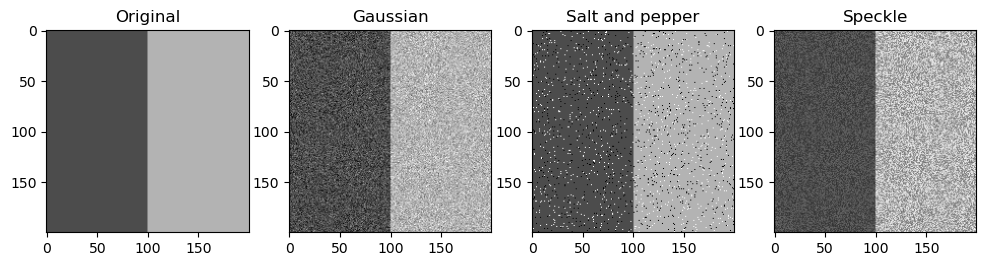

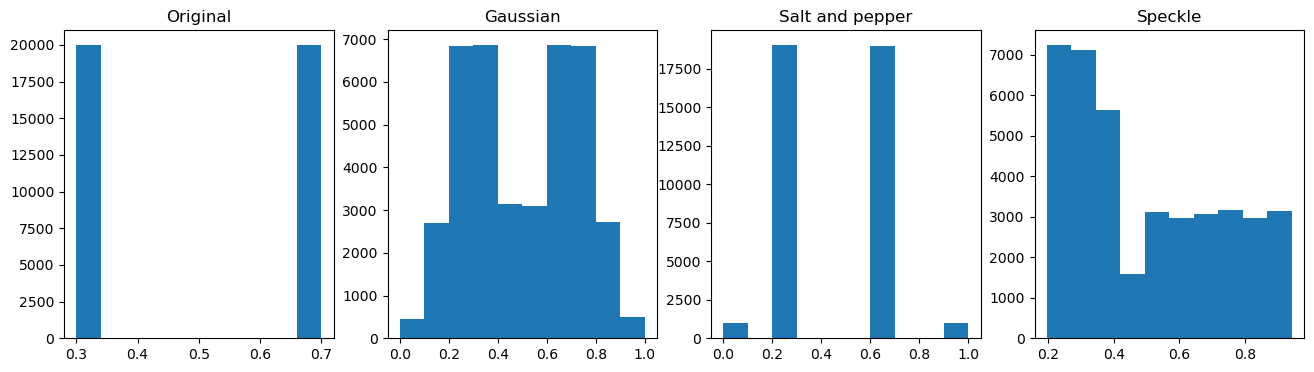

In [5]:
# Part 3 Noise Generation

def imnoise_speckle(im, v): 
    # im: input image
     # v:  variance
     n = np.sqrt(v*12) * (np.random.rand(im.shape[0], im.shape[1]) - 0.5)
     return im + im * n

def plot_histograms(images, figsize=(16,4)):
    fig, axes = plt.subplots(1, 4, figsize=figsize)
    for index, (subtitle, image) in enumerate(images.items(), 0):
        axes[index].hist(image.flatten())
        axes[index].title.set_text(subtitle)


f = np.hstack([0.3*np.ones((200,100)), 0.7*np.ones((200,100))])

f_gaussian = skimage.util.random_noise(f, mode='gaussian', mean=0,var=0.01)
f_sandp = skimage.util.random_noise(f, mode='s&p') # noise density of 0.05 default (?)
f_speckle = imnoise_speckle(f, 0.04)

images = {
    'Original': f,
    'Gaussian': f_gaussian, 
    'Salt and pepper': f_sandp, 
    'Speckle': f_speckle }

plot_images(images, vmin_vmax = True)
plot_histograms((images))


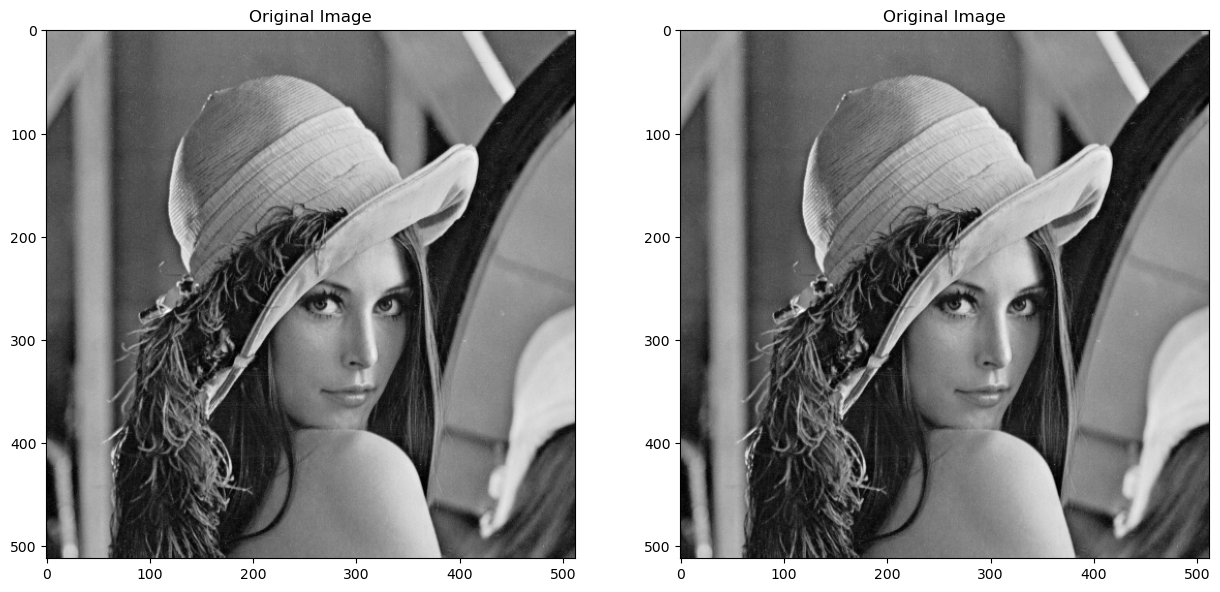

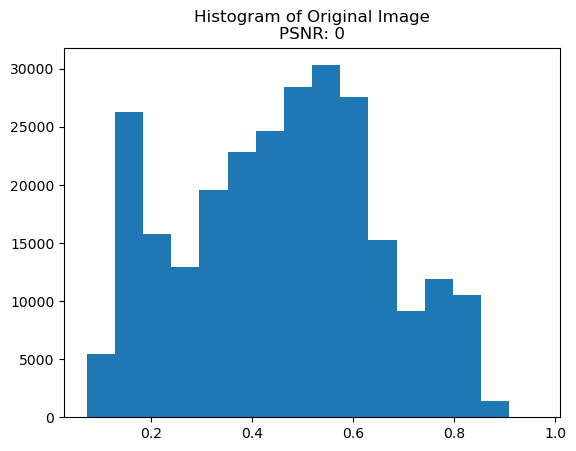

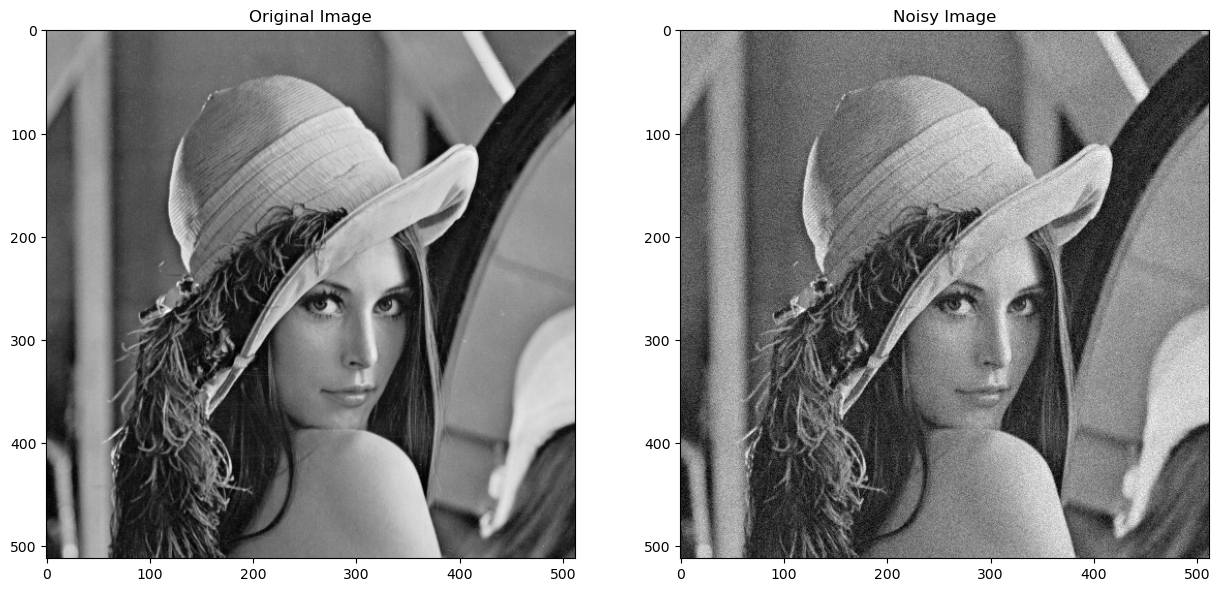

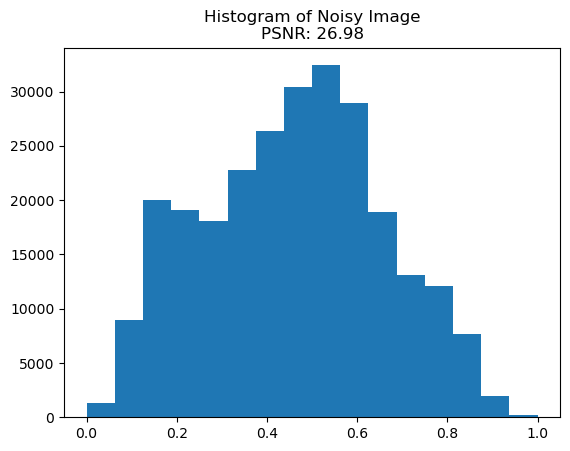

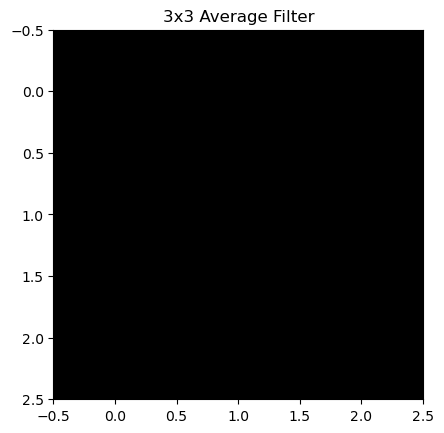

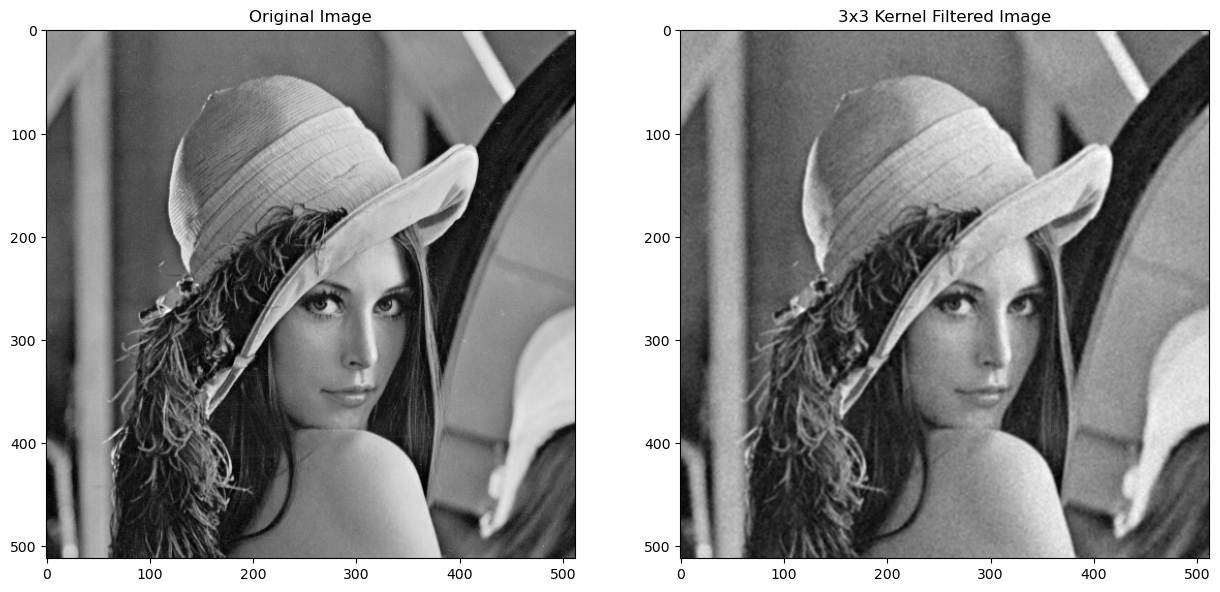

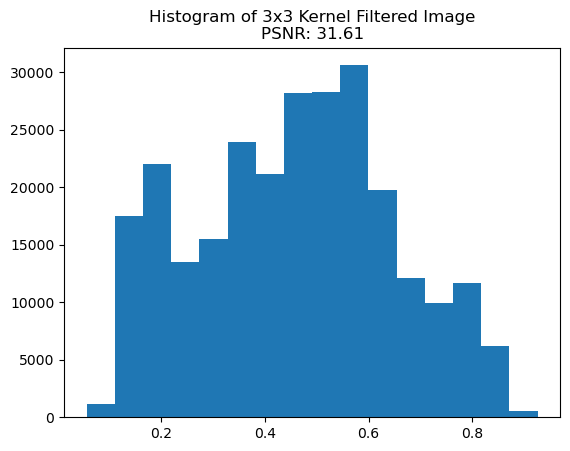

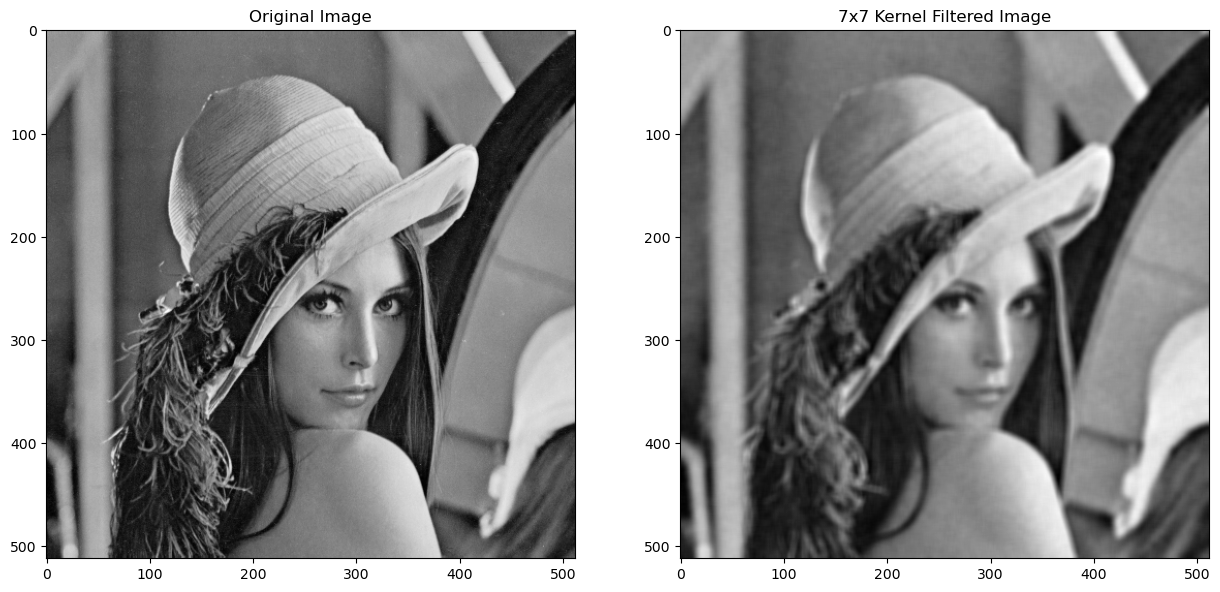

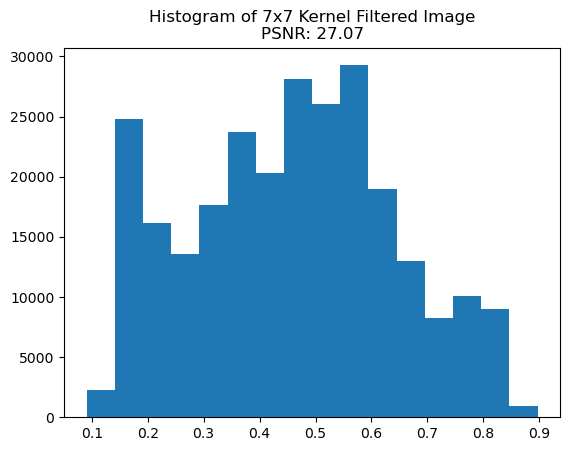

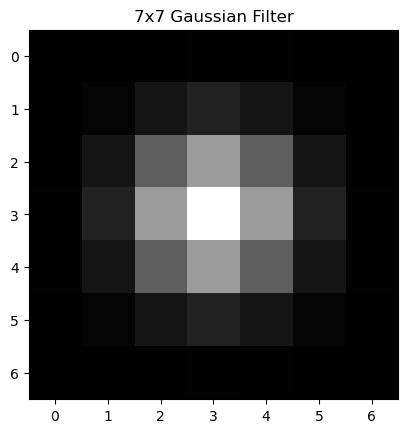

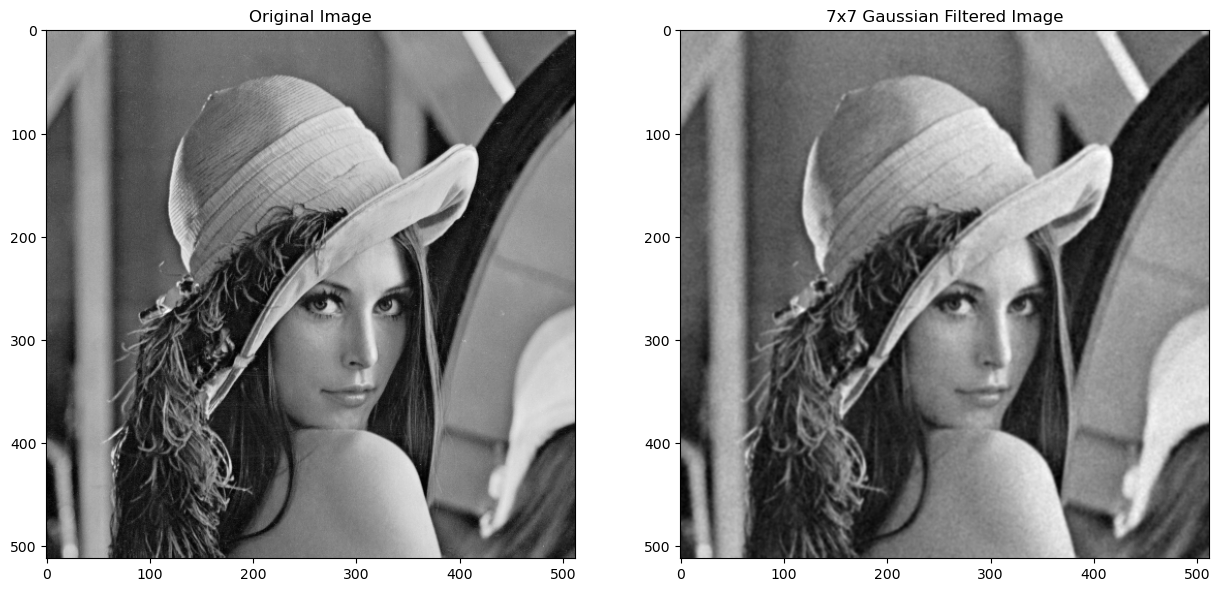

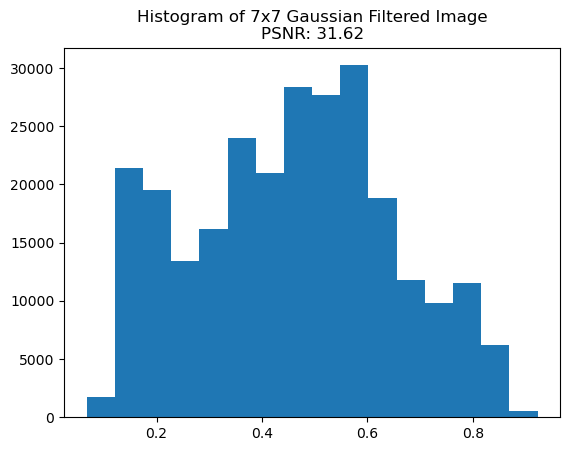

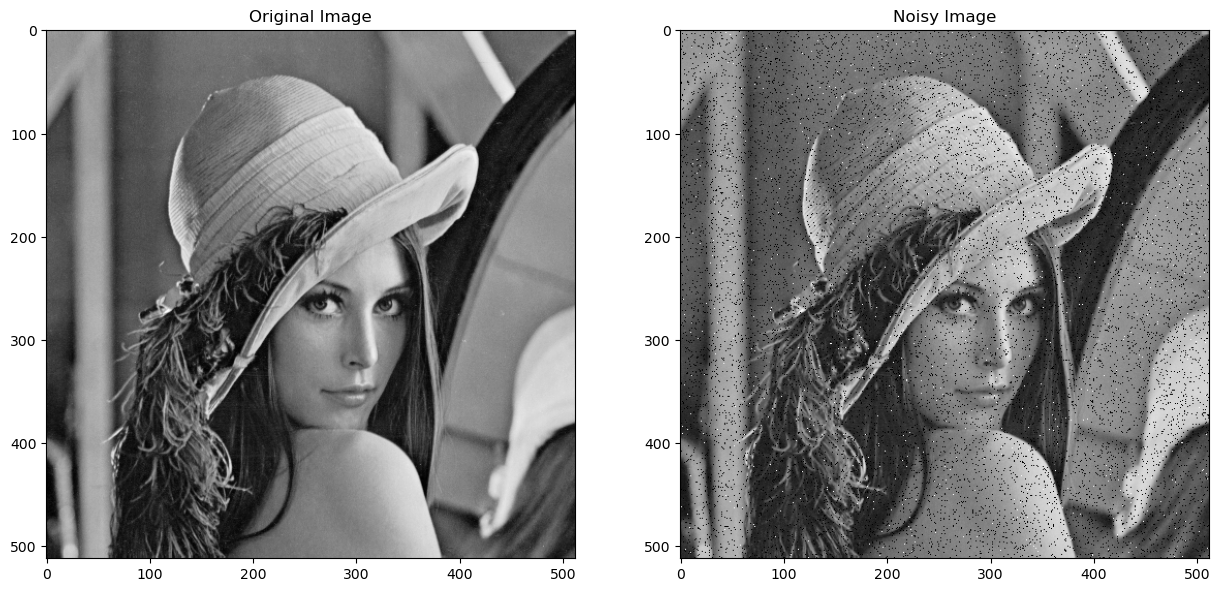

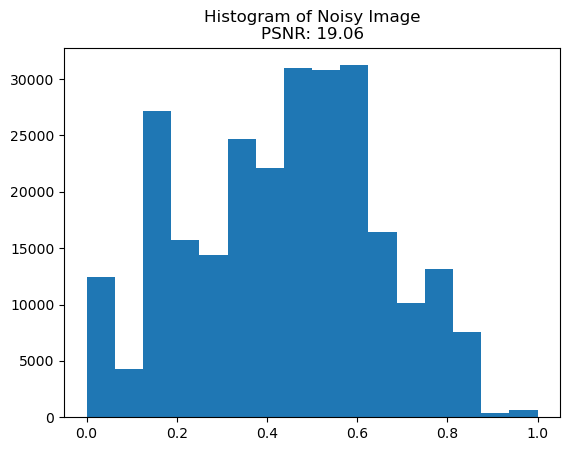

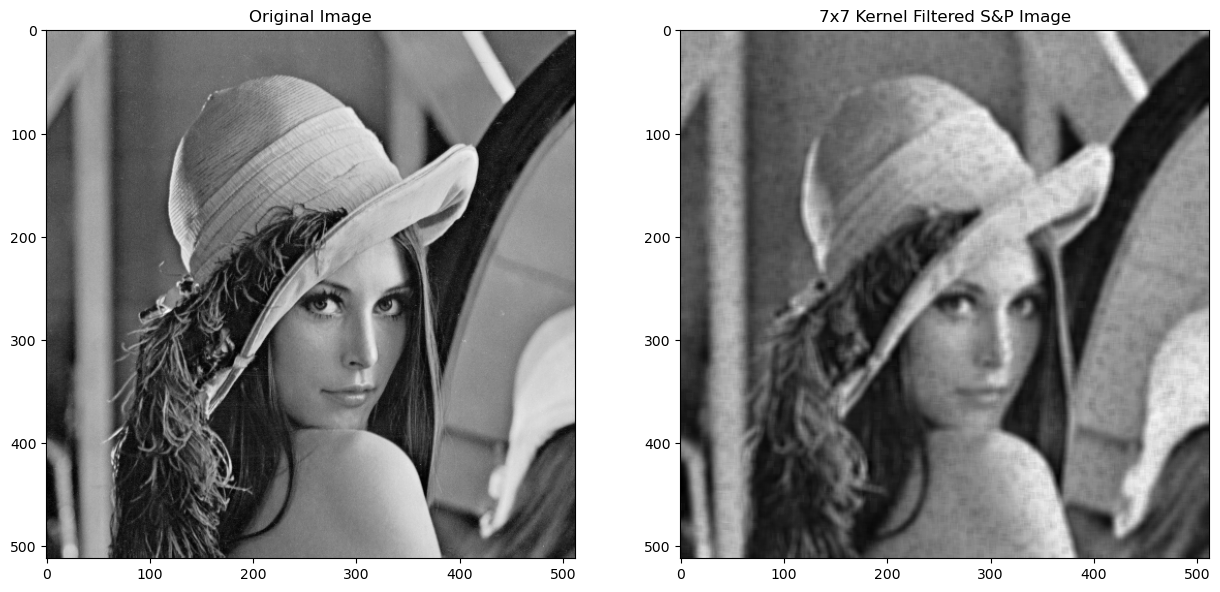

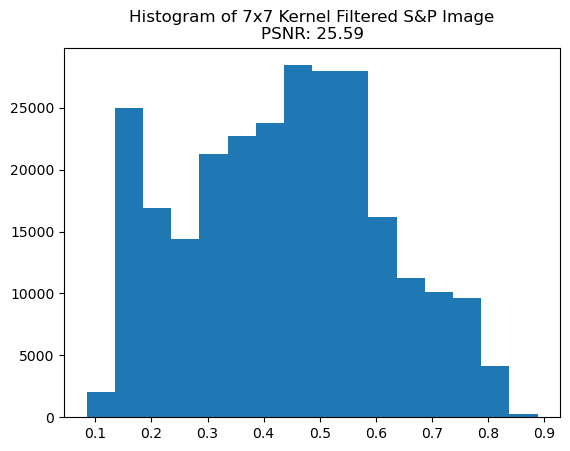

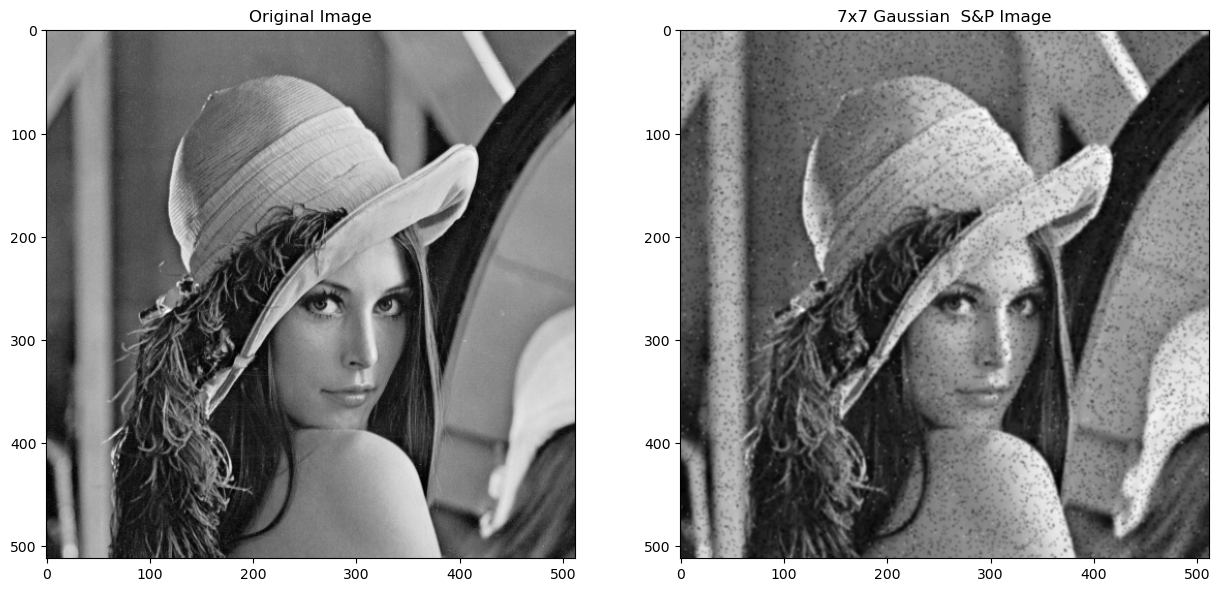

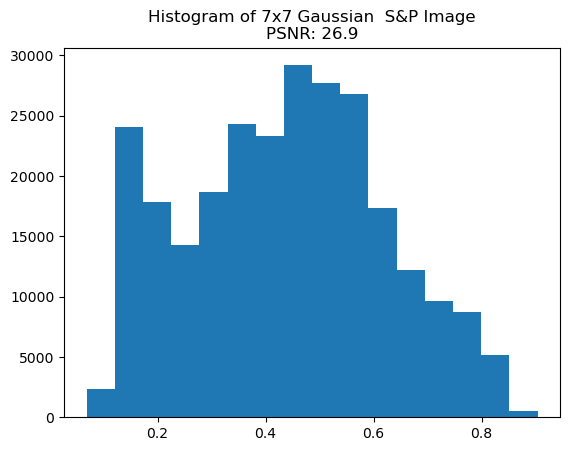

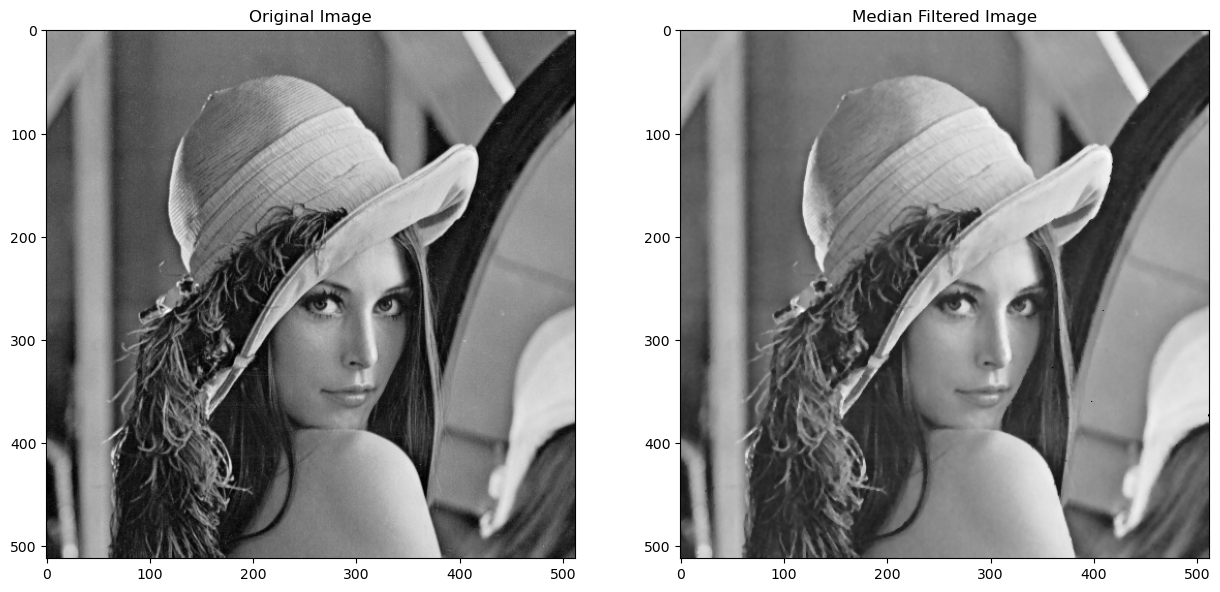

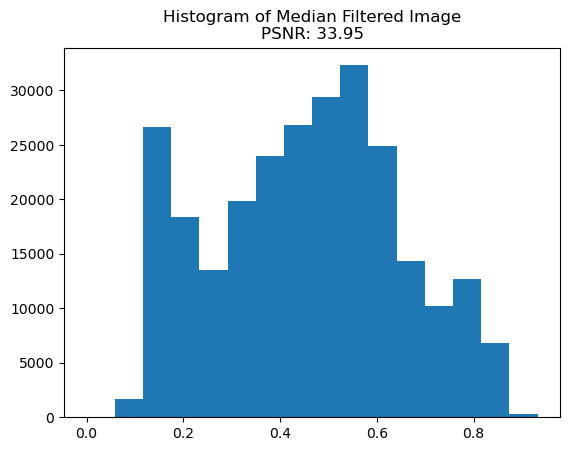

In [8]:
# Part 4 Noise Reduction in the Spatial Domain

def plot_images_histogram(image, title, img_psnr):
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(lena)
    plt.title('Original Image')
    plt.subplot(1,2,2)
    plt.imshow(image)
    plt.title(title)
    plt.show()
    plt.hist(image.flatten(), bins=16)
    plt.title('Histogram of ' + title + '\n' + 'PSNR: ' + str(round(img_psnr, 2)))
    plt.show()

# create noisy lena
noisy_lena = skimage.util.random_noise(lena, mode='gaussian', mean=0,var=0.002)
noisy_lena_psnr = PSNR(noisy_lena, lena)
plot_images_histogram(lena, 'Original Image', 0)
plot_images_histogram(noisy_lena, 'Noisy Image', noisy_lena_psnr)

# 3x3 kernel
avg_filter_3x3 = np.ones((3,3))/(3.0*3.0)
plt.imshow(avg_filter_3x3)
plt.title('3x3 Average Filter')

# apply filter
#filtered_lena_3x3 = ndimage.convolve(noisy_lena, avg_filter, mode='constant', cval=0.0)
filtered_lena_3x3 = ndimage.convolve(noisy_lena, avg_filter_3x3)
filtered_lena_psnr_3x3 = PSNR(filtered_lena_3x3, lena)
plot_images_histogram(filtered_lena_3x3, '3x3 Kernel Filtered Image', filtered_lena_psnr_3x3)

# 7x7 filter
avg_filter_7x7 = np.ones((7,7))/(7.0*7.0)
filtered_lena_7x7 = ndimage.convolve(noisy_lena, avg_filter_7x7)
filtered_lena_psnr_7x7 = PSNR(filtered_lena_7x7, lena)
plot_images_histogram(filtered_lena_7x7, '7x7 Kernel Filtered Image', filtered_lena_psnr_7x7)

# guassian filter
gaussian_filter_7x7 = gaussian_filter(7,7,1)
plt.imshow(gaussian_filter_7x7)
plt.title('7x7 Gaussian Filter')
# apply filter
filtered_lena_gaussian = ndimage.convolve(noisy_lena, gaussian_filter_7x7)
filtered_lena_psnr_gaussian = PSNR(filtered_lena_gaussian, lena)
plot_images_histogram(filtered_lena_gaussian, '7x7 Gaussian Filtered Image', filtered_lena_psnr_gaussian)

# salt and pepper filter
# NOTE should we be applying the s&p to the original image or the noisy image?
sp_noisy_lena = skimage.util.random_noise(lena, mode='s&p', salt_vs_pepper=0.05)
sp_noisy_lena_psnr = PSNR(sp_noisy_lena, lena)
plot_images_histogram(sp_noisy_lena, 'Noisy Image', sp_noisy_lena_psnr)
# s&p 7x7 filtered image
sp_filtered_lena_7x7 = ndimage.convolve(sp_noisy_lena, avg_filter_7x7)
sp_filtered_lena_psnr_7x7 = PSNR(sp_filtered_lena_7x7, lena)
plot_images_histogram(sp_filtered_lena_7x7, '7x7 Kernel Filtered S&P Image', sp_filtered_lena_psnr_7x7)
# s&p gaussian filtered image
sp_filtered_lena_gaussian = ndimage.convolve(sp_noisy_lena, gaussian_filter_7x7)
sp_filtered_lena_psnr_gaussian = PSNR(sp_filtered_lena_gaussian, lena)
plot_images_histogram(sp_filtered_lena_gaussian, '7x7 Gaussian  S&P Image', sp_filtered_lena_psnr_gaussian)

# median filter
median_filtered_lena = ndimage.median_filter(sp_noisy_lena, size=3)
median_filtered_lena_psnr = PSNR(median_filtered_lena, lena)
plot_images_histogram(median_filtered_lena, 'Median Filtered Image', median_filtered_lena_psnr)




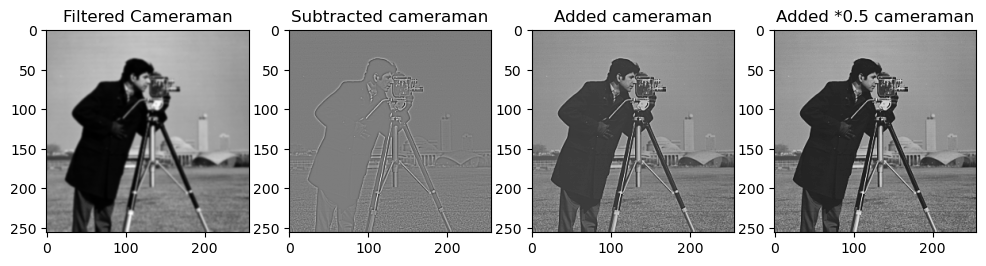

In [7]:
# Pt 5 Sharpening in the Spatial Domain

# guassian filter
gaussian_filter_7x7 = gaussian_filter(7,7,1)

# apply filter
filtered_camera_gaussian = ndimage.convolve(cameraman, gaussian_filter_7x7)
subtracted_camera = cameraman - filtered_camera_gaussian
added_camera = cameraman + subtracted_camera
added_camera_05 = cameraman + subtracted_camera*0.5

part5_images = {
    'Filtered Cameraman': filtered_camera_gaussian, 
    'Subtracted cameraman': subtracted_camera,
    'Added cameraman': added_camera,
    'Added *0.5 cameraman': added_camera_05
    }

plot_images(part5_images)


# plot_images_histogram(filtered_lena_gaussian, '7x7 Gaussian Filtered Image', filtered_lena_psnr_gaussian)